### Read in the data

In [2]:
import numpy as np
import pandas as pd
import requests
import io


# Downloading the csv file from your GitHub account, training data
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/allison2368/ABIDE/main/abide_behavioral.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.columns

Index(['SITE_ID', 'SUB_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX',
       'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ',
       'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE',
       'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
       'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE',
       'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
       'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
       'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION',
       'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION',
       'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL',
       'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME',
       'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED',
       'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED',
       'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED',
       'VINELAND_DOMESTIC_

### Preprocessing

Find where there are actual severity values 

In [3]:

# get the indexes of dataframe where there are severity values
severity = df['ADOS_GOTHAM_SEVERITY']
severity_complete = severity.replace([np.nan], 0)
severity_complete = severity_complete.replace(-9999.0, "na")

severity_list = []
#print(df['ADOS_GOTHAM_SEVERITY'])
for i in severity_complete:
    severity_list.append(i)

print(severity_list)
ind_first = severity_list.index(1.0)
ind_last = severity_list.index(0)
print(ind_first, ind_last)

['na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 

In [4]:
# should be indexes 44 and 317 
df[ind_first:ind_last]

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
44,UCLA_1,51205,1,1,17.9400,1,R,NaN,102.0,105.0,...,1.0,17.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,UM_1,50281,1,2,10.7000,1,R,NaN,132.0,131.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,UM_2,50397,1,1,14.7000,1,-9999,NaN,116.0,132.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,USM,50432,2,0,18.2806,1,NaN,73.33,131.0,127.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,USM,50433,2,0,18.7379,1,NaN,-60.00,100.0,98.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,USM,50506,1,1,15.9343,1,NaN,60.00,73.0,77.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,USM,50510,1,1,14.1437,1,NaN,66.67,102.0,104.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,USM,50513,1,1,18.4668,1,NaN,-93.33,102.0,97.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,YALE,50604,1,1,14.4200,2,R,NaN,85.0,79.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove unnamed columns and mixed type columns 

In [5]:
# now we should preprocess the data
# remove the columns that are unnamed 
df_new = df.drop(columns=['Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80'])

# look at the data types of columns
#print(df_new.dtypes)

# remove these columns becuase they are categorical and numerical: 
# COMORBIDITY MEDICATION_NAME	OFF_STIMULANTS_AT_SCAN	VINELAND_RECEPTIVE_V_SCALED	VINELAND_EXPRESSIVE_V_SCALED	VINELAND_WRITTEN_V_SCALED
df_new = df_new.drop(columns=['CURRENT_MED_STATUS','VINELAND_COMMUNICATION_STANDARD','VINELAND_PERSONAL_V_SCALED',	'VINELAND_DOMESTIC_V_SCALED',	'VINELAND_COMMUNITY_V_SCALED',	'VINELAND_DAILYLVNG_STANDARD','SITE_ID','COMORBIDITY', 'MEDICATION_NAME', 'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED'])
# encode these variables:fit, 
# viq, piq, sex, handiness category DX_GROUP	DSM_IV_TR research reliable, ados module 
print(df_new.dtypes)

for col in df_new.columns:
    if df_new[col].dtype == 'object':
        df_new[col] = df_new[col].str.lower()



SUB_ID                     int64
DX_GROUP                   int64
DSM_IV_TR                  int64
AGE_AT_SCAN              float64
SEX                        int64
                          ...   
WISC_IV_CODING_SCALED    float64
WISC_IV_SYM_SCALED       float64
EYE_STATUS_AT_SCAN       float64
AGE_AT_MPRAGE            float64
BMI                      float64
Length: 61, dtype: object


Replace -9999 values with NA, encode the categorical variables 

In [6]:
## change the -9999 values to na 

pd.options.display.max_rows = 4000
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame variable
# Replace -9999 with NaN
df_new = df_new.mask(df == -9999, np.nan)


# one hot encode 
one_hot_encoded_data = pd.get_dummies(df_new, columns = ['ADOS_MODULE', 'DX_GROUP','ADI_R_RSRCH_RELIABLE', 'SEX', 'VIQ_TEST_TYPE', 'FIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'DSM_IV_TR', 'HANDEDNESS_CATEGORY']) 
for i in one_hot_encoded_data:
	print(i)


# Initialize a flag to check if any string values exist
string_values_exist = False

# Iterate over each column
for column in one_hot_encoded_data.columns:
    # Check if the column dtype is object (which typically represents strings)
    if one_hot_encoded_data[column].dtype == 'object':
        # Check if any value in the column is a string
        if one_hot_encoded_data[column].apply(lambda x: isinstance(x, str)).any():
            print(f"String values exist in column '{column}'.")
            string_values_exist = True

# If no string values were found, print a message
if not string_values_exist:
    print("No string values found in any column.")


SUB_ID
AGE_AT_SCAN
HANDEDNESS_SCORES
FIQ
VIQ
PIQ
ADI_R_SOCIAL_TOTAL_A
ADI_R_VERBAL_TOTAL_BV
ADI_RRB_TOTAL_C
ADI_R_ONSET_TOTAL_D
ADOS_TOTAL
ADOS_COMM
ADOS_SOCIAL
ADOS_STEREO_BEHAV
ADOS_RSRCH_RELIABLE
ADOS_GOTHAM_SOCAFFECT
ADOS_GOTHAM_RRB
ADOS_GOTHAM_TOTAL
ADOS_GOTHAM_SEVERITY
SRS_VERSION
SRS_RAW_TOTAL
SRS_AWARENESS
SRS_COGNITION
SRS_COMMUNICATION
SRS_MOTIVATION
SRS_MANNERISMS
SCQ_TOTAL
AQ_TOTAL
VINELAND_INTERPERSONAL_V_SCALED
VINELAND_PLAY_V_SCALED
VINELAND_COPING_V_SCALED
VINELAND_SOCIAL_STANDARD
VINELAND_SUM_SCORES
VINELAND_ABC_STANDARD
VINELAND_INFORMANT
WISC_IV_VCI
WISC_IV_PRI
WISC_IV_WMI
WISC_IV_PSI
WISC_IV_SIM_SCALED
WISC_IV_VOCAB_SCALED
WISC_IV_INFO_SCALED
WISC_IV_BLK_DSN_SCALED
WISC_IV_PIC_CON_SCALED
WISC_IV_MATRIX_SCALED
WISC_IV_DIGIT_SPAN_SCALED
WISC_IV_LET_NUM_SCALED
WISC_IV_CODING_SCALED
WISC_IV_SYM_SCALED
EYE_STATUS_AT_SCAN
AGE_AT_MPRAGE
BMI
ADOS_MODULE_2.0
ADOS_MODULE_3.0
ADOS_MODULE_4.0
DX_GROUP_1
DX_GROUP_2
ADI_R_RSRCH_RELIABLE_0.0
ADI_R_RSRCH_RELIABLE_1.0
SEX_1
SEX_2
VI

### Try imputing the data without scaling first

This is with unscaled data 

In [22]:

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_3 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_3['ADOS_GOTHAM_SEVERITY'])

# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_1 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_1['ADOS_GOTHAM_SEVERITY'])



# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=5)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_5 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_5['ADOS_GOTHAM_SEVERITY'])


# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=10)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_10 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_10['ADOS_GOTHAM_SEVERITY'])




0        8.666667
1        6.000000
2        7.666667
3        7.666667
4        6.666667
5        7.666667
6        6.666667
7        8.333333
8        6.333333
9        7.666667
10       8.000000
11       6.000000
12       7.666667
13       8.333333
14       7.333333
15       8.000000
16       6.333333
17       8.666667
18       8.666667
19       7.000000
20       7.333333
21       7.333333
22       8.000000
23       8.666667
24       7.666667
25       8.000000
26       7.333333
27       8.000000
28       9.000000
29       8.000000
30       6.666667
31       7.333333
32       8.666667
33       7.000000
34       4.333333
35       5.666667
36       8.000000
37       7.000000
38       7.000000
39       9.000000
40       7.333333
41       6.333333
42       6.000000
43       5.666667
44       1.000000
45       1.000000
46       1.000000
47       1.000000
48       1.000000
49       1.000000
50       1.000000
51       1.000000
52       1.000000
53       1.000000
54       1.000000
55       1

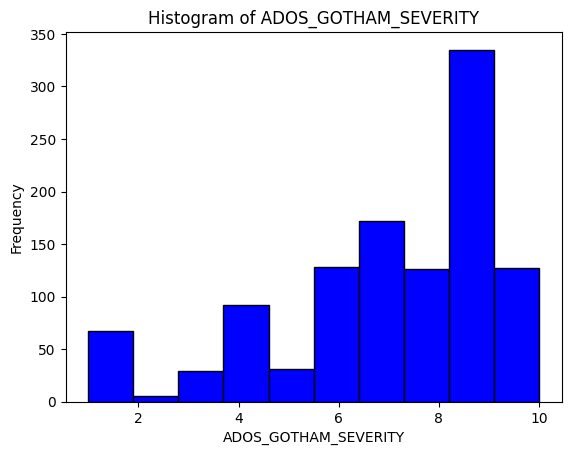

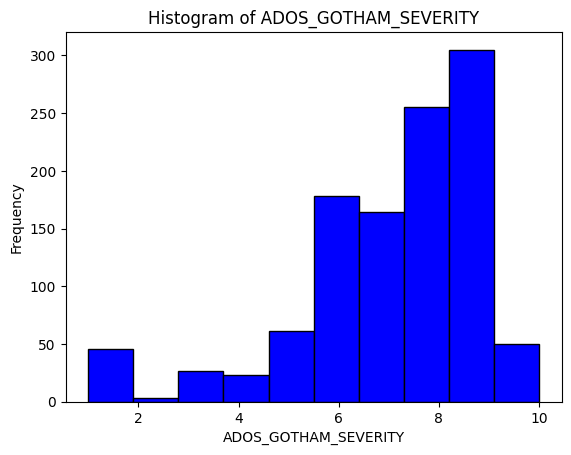

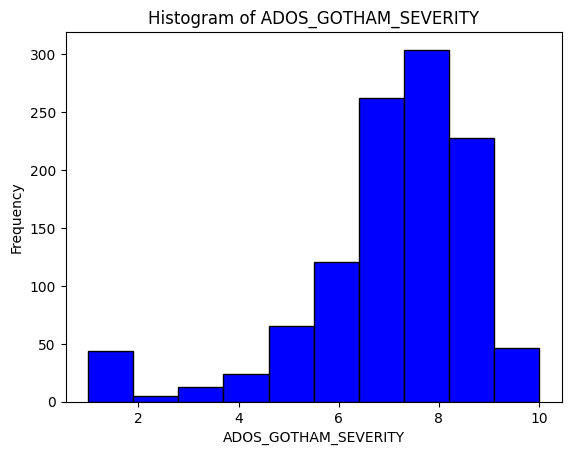

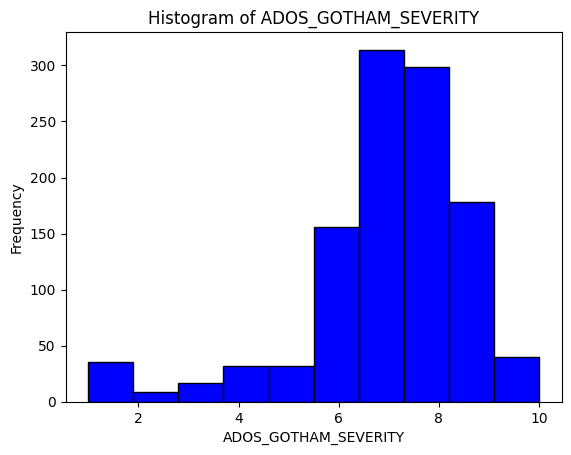

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_1['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


# second histogram 

# Plot histogram
plt.hist(imputed_df_3['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()

# third histogram 

# Plot histogram
plt.hist(imputed_df_5['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


# fourth histogram 

# Plot histogram
plt.hist(imputed_df_10['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()

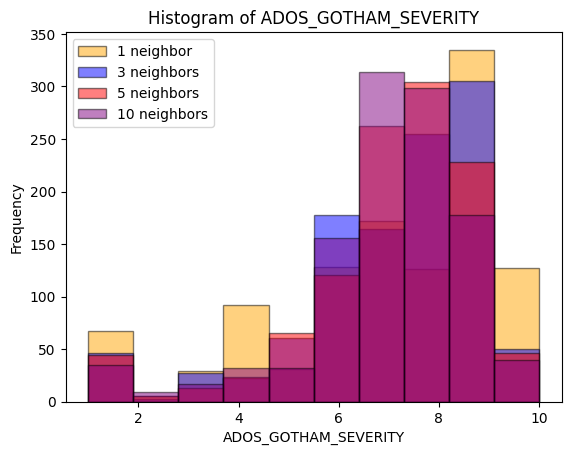

In [24]:
import matplotlib.pyplot as plt

# Plot first histogram
plt.hist(imputed_df_1['ADOS_GOTHAM_SEVERITY'], bins=10, color='orange', edgecolor='black', alpha=0.5, label='1 neighbor')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_3['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black', alpha=0.5, label='3 neighbors')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_5['ADOS_GOTHAM_SEVERITY'], bins=10, color='red', edgecolor='black', alpha=0.5, label='5 neighbors')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_10['ADOS_GOTHAM_SEVERITY'], bins=10, color='purple', edgecolor='black', alpha=0.5, label='10 neighbors')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')
plt.legend()

# Show plot
plt.show()


for the cross validation, check each severity type 

### min max scaling 

      ADOS_GOTHAM_SEVERITY
0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7                      NaN
8                      NaN
9                      NaN
10                     NaN
11                     NaN
12                     NaN
13                     NaN
14                     NaN
15                     NaN
16                     NaN
17                     NaN
18                     NaN
19                     NaN
20                     NaN
21                     NaN
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                     NaN
28                     NaN
29                     NaN
30                     NaN
31                     NaN
32                     NaN
33                     NaN
34                     NaN
35                     NaN
3

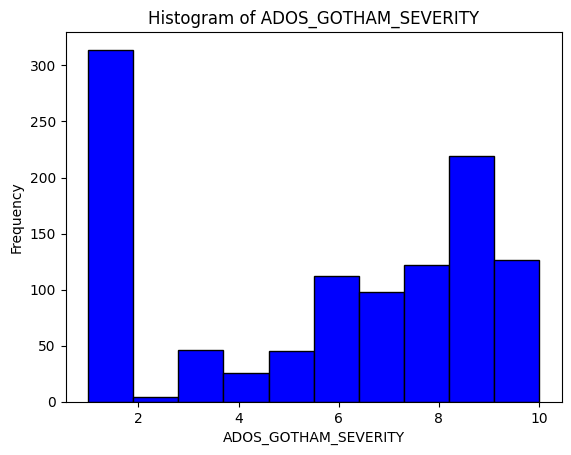

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame called one_hot_encoded_data
# Assuming you have a variable called 'severity_column' storing the 'ADOS_GOTHAM_SEVERITY' column
severity_column = one_hot_encoded_data['ADOS_GOTHAM_SEVERITY']
# Remove the 'ADOS_GOTHAM_SEVERITY' column
one_hot_encoded_data_without_severity = one_hot_encoded_data.drop('ADOS_GOTHAM_SEVERITY', axis=1)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(one_hot_encoded_data_without_severity)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_encoded_data_without_severity.columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values


print(scaled_df.iloc[:,-1:])

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
#print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


since the graph looks a little off, we want to try out different columns to see what is affecting the skew 

      AGE_AT_SCAN       FIQ       PIQ       VIQ  ADOS_GOTHAM_SEVERITY
0        0.284026  0.719626  0.558333  0.630435                   NaN
1        0.561272  0.682243  0.683333  0.478261                   NaN
2        0.322440  0.476636  0.491667  0.340580                   NaN
3        0.311837  0.532710  0.425000  0.478261                   NaN
4        0.150704  0.626168  0.650000  0.420290                   NaN
5        0.198331  0.663551  0.591667  0.514493                   NaN
6        0.159743  0.570093  0.591667  0.384058                   NaN
7        0.178516  0.635514  0.683333  0.405797                   NaN
8        0.162350  0.551402  0.625000  0.340580                   NaN
9        0.170346  0.766355  0.600000  0.644928                   NaN
10       0.140101  0.504673  0.425000  0.434783                   NaN
11       0.408656  0.598131  0.550000  0.456522                   NaN
12       0.287155  0.869159  0.725000  0.681159                   NaN
13       0.270641  0

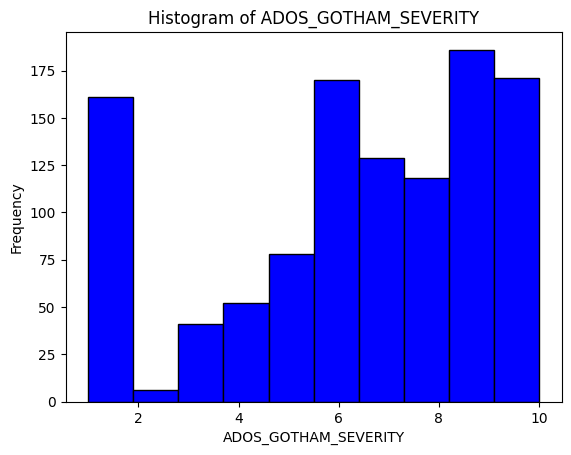

In [13]:
# we first try 4 columns and scale those 
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ']

adjusted_df = one_hot_encoded_data_without_severity[columns]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(adjusted_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ', 'ADOS_GOTHAM_SEVERITY']
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()



      AGE_AT_SCAN       FIQ       PIQ       VIQ  ADOS_TOTAL  ADOS_COMM  \
0        0.284026  0.719626  0.558333  0.630435    0.272727      0.250   
1        0.561272  0.682243  0.683333  0.478261    0.363636      0.375   
2        0.322440  0.476636  0.491667  0.340580    0.454545      0.250   
3        0.311837  0.532710  0.425000  0.478261    0.681818      0.375   
4        0.150704  0.626168  0.650000  0.420290    0.454545      0.375   
5        0.198331  0.663551  0.591667  0.514493    0.545455      0.625   
6        0.159743  0.570093  0.591667  0.384058    0.681818      0.625   
7        0.178516  0.635514  0.683333  0.405797    0.227273      0.375   
8        0.162350  0.551402  0.625000  0.340580    0.772727      0.625   
9        0.170346  0.766355  0.600000  0.644928    0.681818      0.500   
10       0.140101  0.504673  0.425000  0.434783    0.500000      0.375   
11       0.408656  0.598131  0.550000  0.456522    0.363636      0.625   
12       0.287155  0.869159  0.725000 

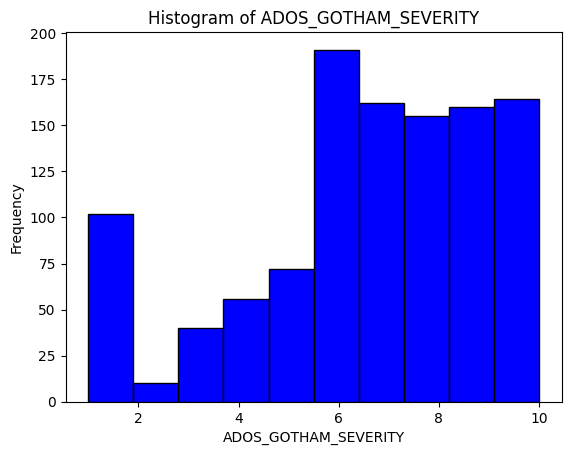

In [17]:
# we first try 4 columns and scale those 
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL', 'BMI', 'SEX_1', 'SEX_2']

adjusted_df = one_hot_encoded_data_without_severity[columns]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(adjusted_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL',  'BMI', 'SEX_1', 'SEX_2', 'ADOS_GOTHAM_SEVERITY']
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()



      AGE_AT_SCAN       FIQ       PIQ       VIQ  ADOS_TOTAL  ADOS_COMM  \
0        0.284026  0.719626  0.558333  0.630435    0.272727      0.250   
1        0.561272  0.682243  0.683333  0.478261    0.363636      0.375   
2        0.322440  0.476636  0.491667  0.340580    0.454545      0.250   
3        0.311837  0.532710  0.425000  0.478261    0.681818      0.375   
4        0.150704  0.626168  0.650000  0.420290    0.454545      0.375   
5        0.198331  0.663551  0.591667  0.514493    0.545455      0.625   
6        0.159743  0.570093  0.591667  0.384058    0.681818      0.625   
7        0.178516  0.635514  0.683333  0.405797    0.227273      0.375   
8        0.162350  0.551402  0.625000  0.340580    0.772727      0.625   
9        0.170346  0.766355  0.600000  0.644928    0.681818      0.500   
10       0.140101  0.504673  0.425000  0.434783    0.500000      0.375   
11       0.408656  0.598131  0.550000  0.456522    0.363636      0.625   
12       0.287155  0.869159  0.725000 

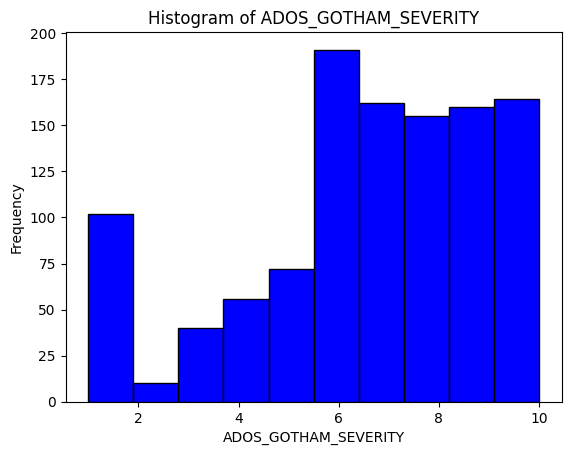

In [39]:
# we first try 4 columns and scale those 
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL', 'BMI', 'SEX_1', 'SEX_2']

adjusted_df = one_hot_encoded_data_without_severity[columns]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(adjusted_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL',  'BMI', 'SEX_1', 'SEX_2', 'ADOS_GOTHAM_SEVERITY']
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()



Testing with standard scaler instead

        SUB_ID  AGE_AT_SCAN  HANDEDNESS_SCORES       FIQ       VIQ       PIQ  \
0     0.461062     0.717201           0.051291  0.638510  1.305019 -0.171227   
1     0.463297     2.702809           0.831380  0.372991  0.011553  0.807164   
2     0.465531     0.992323           0.620545 -1.087366 -1.158726 -0.693036   
3     0.467766     0.916384           0.641628 -0.689087  0.011553 -1.214844   
4     0.476705    -0.237634           0.641628 -0.025288 -0.481196  0.546260   
5     0.492348     0.103468           0.451877  0.240231  0.319521  0.089677   
6     0.539278    -0.172899           0.451877 -0.423567 -0.789164  0.089677   
7     0.541512    -0.038450           0.304293  0.041092 -0.604383  0.807164   
8     0.543747    -0.154226          -2.267890 -0.556327 -1.158726  0.350581   
9     0.545982    -0.096960          -1.972722  0.970409  1.428206  0.154903   
10    0.550451    -0.313572          -1.276967 -0.888226 -0.358009 -1.214844   
11    0.586207     1.609791           0.

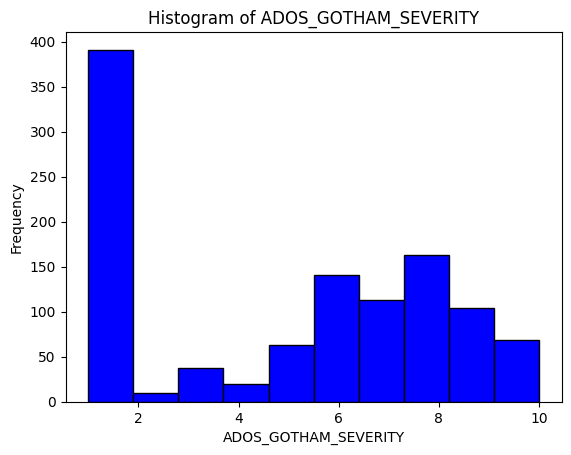

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called one_hot_encoded_data
# Assuming you have a variable called 'severity_column' storing the 'ADOS_GOTHAM_SEVERITY' column
severity_column = one_hot_encoded_data['ADOS_GOTHAM_SEVERITY']
# Remove the 'ADOS_GOTHAM_SEVERITY' column
one_hot_encoded_data_without_severity = one_hot_encoded_data.drop('ADOS_GOTHAM_SEVERITY', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(one_hot_encoded_data_without_severity)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_encoded_data_without_severity.columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)


# Impute the data using sklearn KNNImputer 
# KNNImputer only works with numpy array

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


test the columns to see which ones are affecting the scaling 

figure out knn is handling missing values - how it imputes the actual score 
figure out why the different scaling methods have different results, plot the different distributions
how to use cross validation to pick the best k and state why its the best - do it for each severity 
how to visualize? combine plots